In [110]:
import pandas as pd
import pandasql as ps
import math

import seaborn as sns
import matplotlib.pyplot as plt

## PCA for points vs played
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Feature Engeneering

In [111]:
players_df = pd.read_csv("./data/out/players.csv")
# players_df = players_df.drop(columns="player_name_y")


In [112]:
## Create current age

players_df["DOB"] = pd.to_datetime(players_df["DOB"])
current_year = 2022
# Calculate the age based on the "DOB" column and the current year
players_df["current_age"] = current_year - players_df["DOB"].dt.year

# Make sure age is an integer
# players_df["current_age"] = players_df["current_age"].astype(int)

In [254]:
players_df.dtypes

BVB_ID                           int64
player_name                     object
player_country                  object
DOB                     datetime64[ns]
home_town                       object
resides                         object
total_first                    float64
total_second                   float64
total_third                    float64
total_forth                    float64
total_played                   float64
total_points                   float64
podium%                        float64
height_in                      float64
big_stat_player_name            object
gender                          object
isBlack_Challenge                 bool
isBlack_Elite16                   bool
isBlack                           bool
player_name_y                   object
duration_avg                   float64
partners_count                 float64
duration_median                float64
height_imputed                 float64
current_age                    float64
games_points_metric      

In [113]:
# adjusted partners
players_df["current_age"].describe()

count    8998.000000
mean       36.691932
std         9.777860
min        14.000000
25%        29.000000
50%        37.000000
75%        44.000000
max        80.000000
Name: current_age, dtype: float64

In [92]:
players_df.to_csv("./data/out/players_v2.csv", index=False)


Text(0, 0.5, 'Total Played')

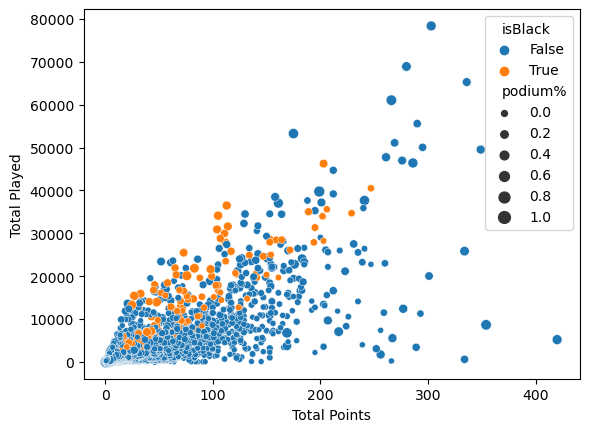

In [119]:
# Create the scatter plot using Seaborn
sns.scatterplot(
    y="total_points", x="total_played", size="podium%", hue="isBlack", data=players_df
)

plt.xlabel("Total Points")
plt.ylabel("Total Played")

Text(0, 0.5, 'Total Point')

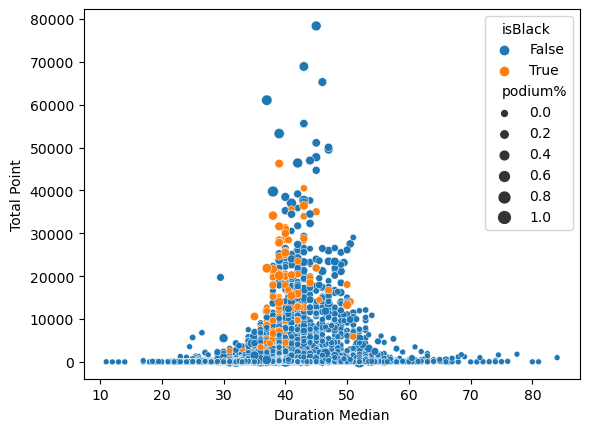

In [118]:
# Create the scatter plot duration vsa points
sns.scatterplot(
    y="total_points",
    x="duration_median",
    size="podium%",
    hue="isBlack",
    data=players_df,
)

plt.xlabel("Duration Median")
plt.ylabel("Total Point")

<Axes: xlabel='partners_count', ylabel='current_age'>

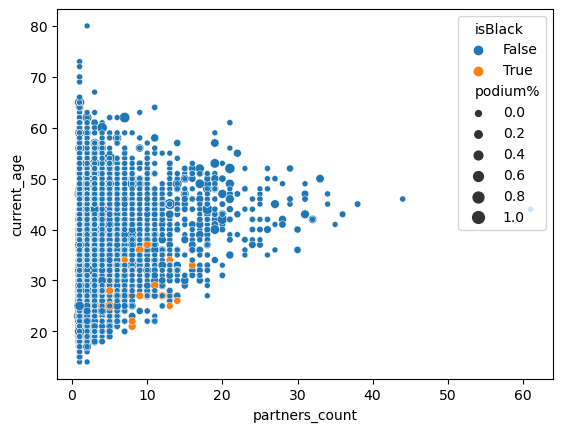

In [117]:
sns.scatterplot(
    x="partners_count",
    y="current_age",
    size="podium%",
    hue="isBlack",
    data=players_df,
)

In [115]:
# imputing some values
# Group by "player_country," "gender," and "current_age" and calculate the median for each group
grouped_medians = (
    players_df[
        [
            "duration_avg",
            "duration_median",
            "partners_count",
            "player_country",
            "gender",
            "current_age",
        ]
    ]
    .groupby(["current_age", "player_country", "gender"])
    .median()
    .reset_index()
)


# # Impute missing values in "duration_avg" using the group median
# players_df["duration_avg_original"] = players_df["duration_avg"]
players_df["duration_avg"] = players_df["duration_avg"].fillna(
    grouped_medians["duration_avg"]
)

# # Impute missing values in "duration_median" using the group median
# players_df["duration_median_original"] = players_df["duration_median"]
players_df["duration_median"] = players_df["duration_median"].fillna(
    grouped_medians["duration_median"]
)

# # Impute missing values in "partners_count" using the group median
# players_df["partners_count_original"] = players_df["partners_count"]
players_df["partners_count"] = players_df["partners_count"].fillna(
    grouped_medians["partners_count"]
)


In [116]:
# Calculate the median values for each column
median_duration_avg = players_df["duration_avg"].median()
median_duration_median = players_df["duration_median"].median()
median_partners_count = players_df["partners_count"].median()

# Fill missing values with corresponding column medians
players_df["duration_avg"].fillna(median_duration_avg, inplace=True)
players_df["duration_median"].fillna(median_duration_median, inplace=True)
players_df["partners_count"].fillna(median_partners_count, inplace=True)

players_df.isna().sum()


BVB_ID                     0
player_name                0
player_country             0
DOB                      997
home_town               3464
resides                 1924
total_first               81
total_second              81
total_third               81
total_forth               81
total_played              81
total_points              81
podium%                   81
height_in               3694
big_stat_player_name       0
gender                     0
isBlack_Challenge          0
isBlack_Elite16            0
isBlack                    0
player_name_y           1399
duration_avg               0
partners_count             0
duration_median            0
height_imputed             0
current_age              997
dtype: int64

In [95]:
# Drop rows with NaN values in the "total_points" column
players_df.dropna(subset=["total_points"], inplace=True)


In [125]:
players_df[
    (players_df["isBlack"]) & (players_df["total_played"].isna())
]  ## 3 players dont have big-stat data, there are no records on this
# I am going to impute it making average by coutry and gender and year-born

,BVB_ID,player_name,player_country,DOB,home_town,resides,total_first,total_second,total_third,total_forth,...,gender,isBlack_Challenge,isBlack_Elite16,isBlack,player_name_y,duration_avg,partners_count,duration_median,height_imputed,current_age


In [121]:
# remove all missing DOB
players_df.dropna(subset=["DOB"], inplace=True)

In [127]:
players_df.dropna(subset=["total_played"], inplace=True)

In [130]:
# Extract the features for PCA (total_played and total_points)
features = players_df[["total_played", "total_points"]]

# Normalize the data using StandardScaler
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Create and fit the PCA model on the normalized data
pca = PCA()
pca.fit(normalized_features)
print("Explained ratios:", pca.explained_variance_ratio_)



Explained ratios: [0.89083202 0.10916798]


In [239]:
weights_PC1 = pca.components_[0]
print("Weights (Coefficients) of PC1:")
print(weights_PC1)


Weights (Coefficients) of PC1:
[0.70710678 0.70710678]


a linear combination of "total_played", "total_points"  with equal positive contribution and coefficients [0.70710678 0.70710678]
45 degrees rotation without compression and streach 

In [136]:
# # Transform the data into the PCA space
principal_components = pca.transform(normalized_features)

# # Create a new DataFrame with the transformed data and appropriate column names
# transformed_df = pd.DataFrame(data=transformed_data, columns=["PCA Component 1", "PCA Component 2"])

# # Save the transformed DataFrame to a CSV file
# # transformed_df.to_csv("transformed_data.csv", index=False)
principal_components 

array([[-0.08974523,  0.38579143],
       [ 1.01531897,  1.31354887],
       [ 5.66754274,  5.0716264 ],
       ...,
       [-0.48183479, -0.13888172],
       [-0.41511967, -0.28531533],
       [-0.45889129, -0.24154371]])

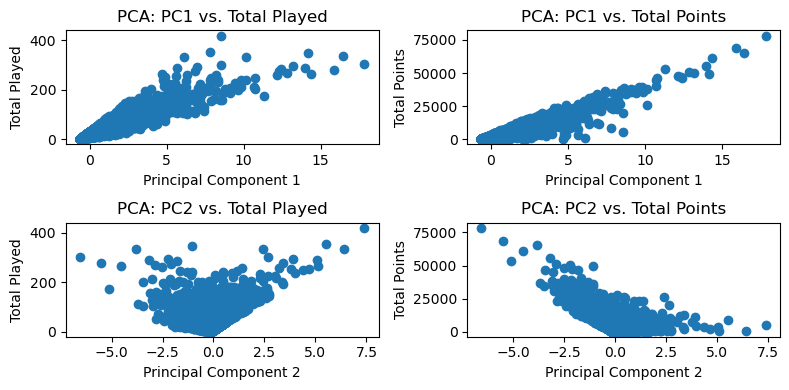

In [142]:
## Visualize principal components
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 4))

# Scatter plot for PC1 vs. total_played
axs[0, 0].scatter(principal_components[:, 0], players_df["total_played"])
axs[0, 0].set_xlabel("Principal Component 1")
axs[0, 0].set_ylabel("Total Played")
axs[0, 0].set_title("PCA: PC1 vs. Total Played")

# Scatter plot for PC1 vs. total_points
axs[0, 1].scatter(principal_components[:, 0], players_df["total_points"])
axs[0, 1].set_xlabel("Principal Component 1")
axs[0, 1].set_ylabel("Total Points")
axs[0, 1].set_title("PCA: PC1 vs. Total Points")

# Scatter plot for PC2 vs. total_played
axs[1, 0].scatter(principal_components[:, 1], players_df["total_played"])
axs[1, 0].set_xlabel("Principal Component 2")
axs[1, 0].set_ylabel("Total Played")
axs[1, 0].set_title("PCA: PC2 vs. Total Played")

# Scatter plot for PC2 vs. total_points
axs[1, 1].scatter(principal_components[:, 1], players_df["total_points"])
axs[1, 1].set_xlabel("Principal Component 2")
axs[1, 1].set_ylabel("Total Points")
axs[1, 1].set_title("PCA: PC2 vs. Total Points")

# Adjust layout to avoid overlapping titles and labels
plt.tight_layout()

# Show the figure with all four scatter plots
plt.show()

In [143]:
# Add PC1 to the DataFrame as a new column "games_points_metric"
pc1 = principal_components[:, 0]
players_df["games_points_metric"] = pc1


In [144]:
players_df.isna().sum()


BVB_ID                     0
player_name                0
player_country             0
DOB                        0
home_town               2584
resides                 1429
total_first                0
total_second               0
total_third                0
total_forth                0
total_played               0
total_points               0
podium%                    0
height_in               2798
big_stat_player_name       0
gender                     0
isBlack_Challenge          0
isBlack_Elite16            0
isBlack                    0
player_name_y            376
duration_avg               0
partners_count             0
duration_median            0
height_imputed             0
current_age                0
games_points_metric        0
dtype: int64

In [145]:
players_df.to_csv("./data/out/players_v2.csv", index=False)

In [147]:
ML_features = [
    "BVB_ID",
    "player_name",
    "player_country",
    "podium%",
    "gender",
    "isBlack_Challenge",
    "isBlack_Elite16",
    "isBlack",
    "partners_count",
    "duration_median",
    "height_imputed",
    "current_age",
    "games_points_metric",
]

players_ML_df = players_df[ML_features]

In [152]:
players_ML_df["gender"]

0       M
1       M
2       M
3       M
4       M
       ..
9924    M
9952    M
9955    M
9956    W
9964    M
Name: gender, Length: 8919, dtype: object

In [154]:
playersM_ML_df = players_ML_df[players_ML_df["gender"] == "M"]
playersM_ML_df.shape
playersM_ML_df

(5055, 13)

In [255]:
playersW_ML_df = players_ML_df[players_ML_df["gender"] == "W"]
playersW_ML_df.shape

(3864, 12)

False    8789
True      130
Name: isBlack, dtype: int64


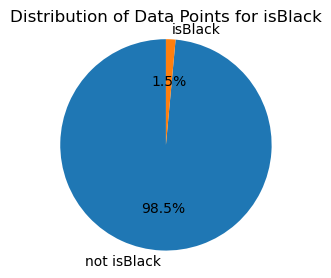

In [256]:
# visualize "isBlack" distribution
data_points_count = players_ML_df["isBlack"].value_counts()
print(data_points_count)
# Create a pie chart
plt.figure(figsize=(3, 3))
plt.pie(
    data_points_count,
    labels=["not isBlack", "isBlack"],
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Distribution of Data Points for isBlack")
plt.axis("equal")  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


In [170]:
playersW_ML_df.to_csv("./data/out/playersW_ML.csv", index=False)


In [171]:
playersM_ML_df.to_csv("./data/out/playersM_ML.csv", index=False)


In [172]:
players_ML_df.to_csv("./data/out/players_ML.csv", index=False)


In [173]:
players_ML_df.set_index("BVB_ID", inplace=True)

## Machine Learning Starts here

In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [180]:
# features = [
#     "podium%",
#     "partners_count",
#     "duration_median",
#     "height_imputed",
#     "games_points_metric",
# ]


features = [
    "partners_count",
    "duration_median",
    "height_imputed",
    "games_points_metric",
]

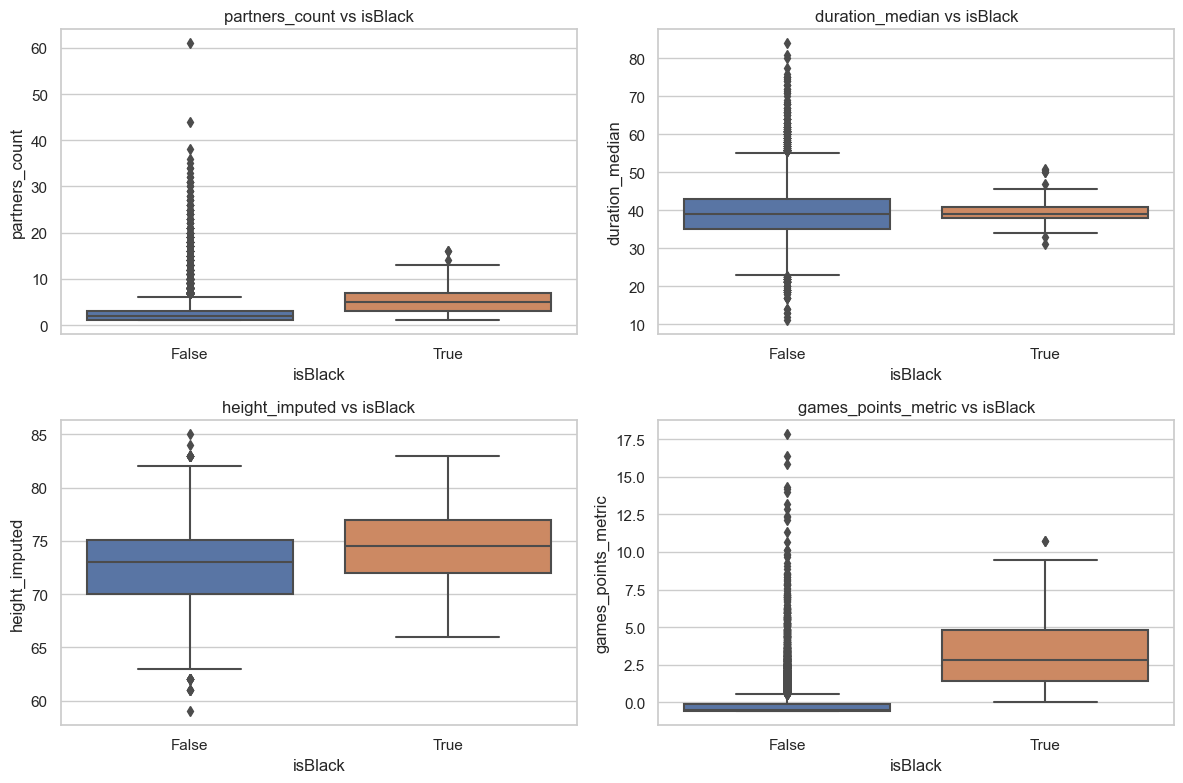

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features
features = [
    "partners_count",
    "duration_median",
    "height_imputed",
    "games_points_metric",
]

# Set style
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="isBlack", y=feature, data=players_ML_df)
    plt.title(f"{feature} vs isBlack")

plt.tight_layout()
plt.show()

In [257]:
### ML Random Forests
# def apply_RandomForest(dataset):
# Separate features and the target variable
def run_random_forest(players_ML_df=players_ML_df):
    X = players_ML_df[features]
    y = players_ML_df["isBlack"].astype(int)

    # Split the data into training, validation, and test sets with stratification
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0, stratify=y
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=0.25, random_state=0, stratify=y_train_val
    )

    # init classifier
    # # Calculate class weights using scikit-learn's class_weight function
    class_weights = class_weight.compute_class_weight("balanced", classes=[0, 1], y=y)
    class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
    print("Class weights ", class_weight_dict)

    # Initialize and train the Random Forest classifier with class weights
    rf_classifier = RandomForestClassifier(
        class_weight=class_weight_dict, random_state=0
    )

    # Use grid search for tuning parameters

    #  Define the parameter grid for hyperparameter tuning
    param_grid = {
        "n_estimators": [100, 200, 300],  # Number of trees in the forest
        "max_depth": [None, 10, 20],  # Maximum depth of the trees
        "min_samples_split": [
            2,
            5,
            10,
        ],  # Minimum number of samples required to split an internal node
        "min_samples_leaf": [
            1,
            2,
            4,
        ],  # Minimum number of samples required to be at a leaf node
        "max_features": [
            "auto",
            "sqrt",
            "log2",
        ],  # Number of features to consider at each split
    }
    # bootstrap default true
    # use grid to optimize parameters on the training set
    grid_search = GridSearchCV(
        estimator=rf_classifier, param_grid=param_grid, cv=5, scoring="f1", n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    # the best hyperparameters and the best estimator (model) from the GridSearchCV results
    best_params = grid_search.best_params_
    best_rf_classifier = grid_search.best_estimator_
    print("Best parameters: ")
    print(best_params)

    # predict validation data
    y_val_pred = best_rf_classifier.predict(X_val)

    ## Classification report for validation dataset
    print("Classification Report for the Validation Set:")
    print(classification_report(y_val, y_val_pred))

    ## Validate the model on the test data
    y_pred_test = best_rf_classifier.predict(X_test)

    ## classification report
    print("Classification Report for Testing Set:")
    print(classification_report(y_test, y_pred_test))

    proba_class_1 = best_rf_classifier.predict_proba(X)[:, 1]
    cutoff_probability = 0.6  # default 0.5
    y_predictions = (proba_class_1 >= cutoff_probability).astype(int)

    print("Classification Report with cutoff probability:")
    print(classification_report(y, y_predictions))
    return best_rf_classifier

In [259]:
players_ML_classifier = run_random_forest(players_ML_df=players_ML_df)

Class weights  {0: 0.5073956081465468, 1: 34.30384615384615}


c:\Users\Marina\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: 
{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Classification Report for the Validation Set:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1758
           1       0.21      0.50      0.29        26

    accuracy                           0.96      1784
   macro avg       0.60      0.74      0.64      1784
weighted avg       0.98      0.96      0.97      1784

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1758
           1       0.24      0.62      0.34        26

    accuracy                           0.97      1784
   macro avg       0.62      0.79      0.66      1784
weighted avg       0.98      0.97      0.97      1784

Classification Report with cutoff probability:
              precision    recall  f1-score   support

           0       1.00      0.

#### Woman Athletes

In [250]:
playersW_ML_classifier = run_random_forest(players_ML_df=playersW_ML_df)


Class weights  {0: 0.508421052631579, 1: 30.1875}


c:\Users\Marina\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Classification Report for the Validation Set:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       760
           1       0.20      0.23      0.21        13

    accuracy                           0.97       773
   macro avg       0.59      0.61      0.60       773
weighted avg       0.97      0.97      0.97       773

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       760
           1       0.33      0.46      0.39        13

    accuracy                           0.98       773
   macro avg       0.66      0.72      0.69       773
weighted avg       0.98      0.98      0.98       773

Classification Report with cutoff probability:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3800
           1       0.67      0.64      0.66        64

    accuracy                           0.99      3

#### Men Athletes

In [260]:
playersM_ML_classifier = run_random_forest(players_ML_df=playersM_ML_df)

Class weights  {0: 0.5066145520144317, 1: 38.29545454545455}


c:\Users\Marina\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: 
{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Classification Report for the Validation Set:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       998
           1       0.24      0.38      0.29        13

    accuracy                           0.98      1011
   macro avg       0.62      0.68      0.64      1011
weighted avg       0.98      0.98      0.98      1011

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       998
           1       0.22      0.31      0.26        13

    accuracy                           0.98      1011
   macro avg       0.61      0.65      0.62      1011
weighted avg       0.98      0.98      0.98      1011

Classification Report with cutoff probability:
              precision    recall  f1-score   support

           0       1.00      0

_Precision (Positive Predictive Value)_: 

$$ Precision = True Positives / (True Positives + False Positives) $$

_Recall (Sensitivity, True Positive Rate)_: Proportion of true positive among all actual positive instances.

$$ Recall = True Positives / (True Positives + False Negatives) $$


_F1-score:_ 

$$ F1-score = 2 * (Precision * Recall) / (Precision + Recall) $$



## Feature Importance

In [244]:
# use feature importance
def get_feature_importance(rm_classifier):
    feature_importances = rm_classifier.feature_importances_

    # Create a DataFrame to store feature importances
    feature_importance_df = pd.DataFrame(
        {"Feature": X.columns, "Importance": feature_importances}
    )

    # Sort the features by importance in descending order
    feature_importance_df = feature_importance_df.sort_values(
        by="Importance", ascending=False
    )

    # Print the feature importance scores
    print(feature_importance_df)


In [247]:
print("Feature importance for the full dataset:\n")
get_feature_importance(players_ML_classifier)


Feature importance for the full dataset:

               Feature  Importance
3  games_points_metric    0.682117
0       partners_count    0.167890
1      duration_median    0.103647
2       height_imputed    0.046345


In [252]:
print("Feature importance for the man dataset:\n")
get_feature_importance(playersM_ML_classifier)


Feature importance for the man dataset:

               Feature  Importance
3  games_points_metric    0.668304
0       partners_count    0.147755
1      duration_median    0.100511
2       height_imputed    0.083430


In [253]:
print("Feature importance for the woman dataset:\n")
get_feature_importance(playersW_ML_classifier)


Feature importance for the woman dataset:

               Feature  Importance
3  games_points_metric    0.640006
0       partners_count    0.185067
1      duration_median    0.096430
2       height_imputed    0.078497


### Tree Visualization

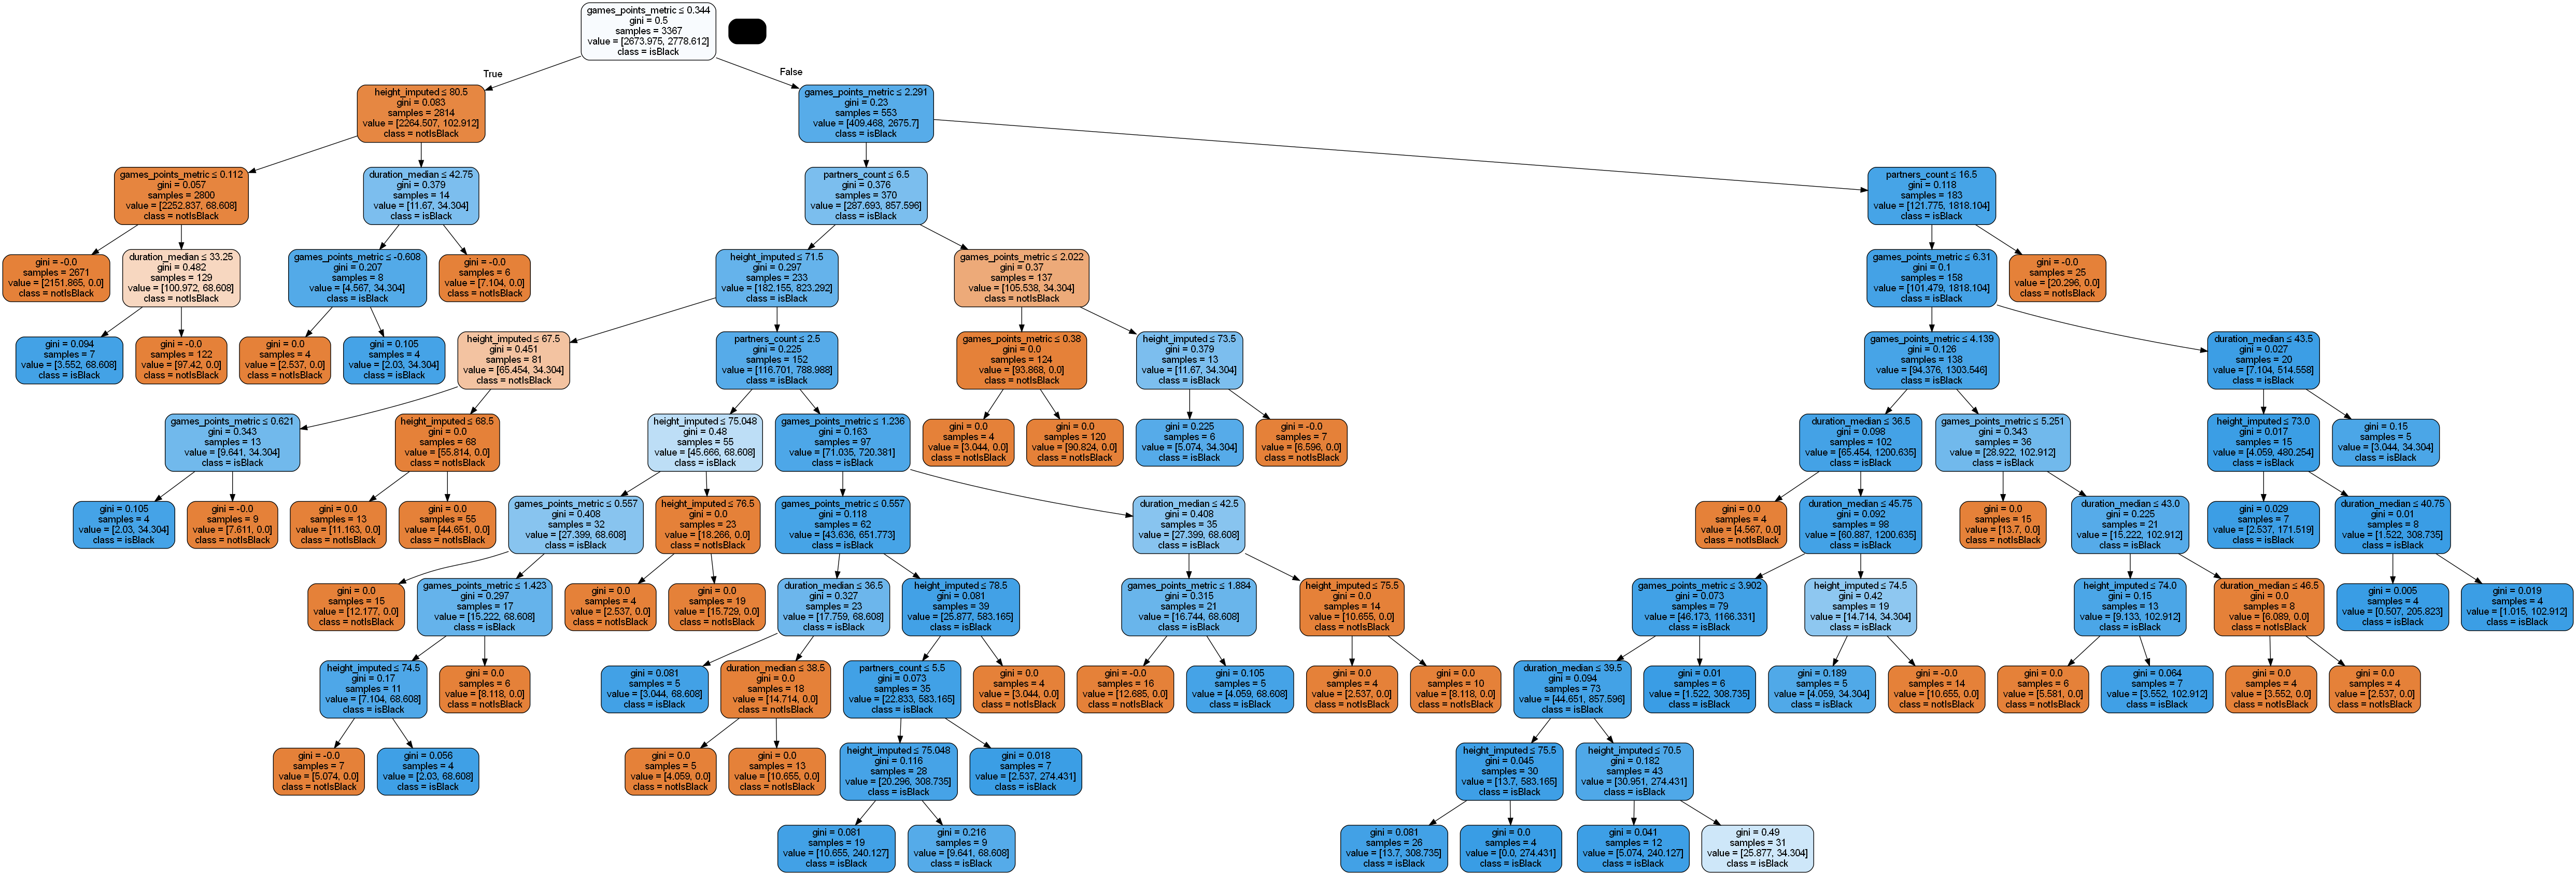

In [263]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Assuming you have already trained the best_rf_classifier using GridSearchCV

# Get the first decision tree from the ensemble (assuming n_estimators=1)
tree = best_rf_classifier.estimators_[0]

# Create DOT data for the decision tree
dot_data = export_graphviz(
    tree,
    out_file=None,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=X.columns,
    class_names=["notIsBlack", "isBlack"],
)

# Generate the graph from the DOT data using pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the decision tree
Image(graph.create_png())

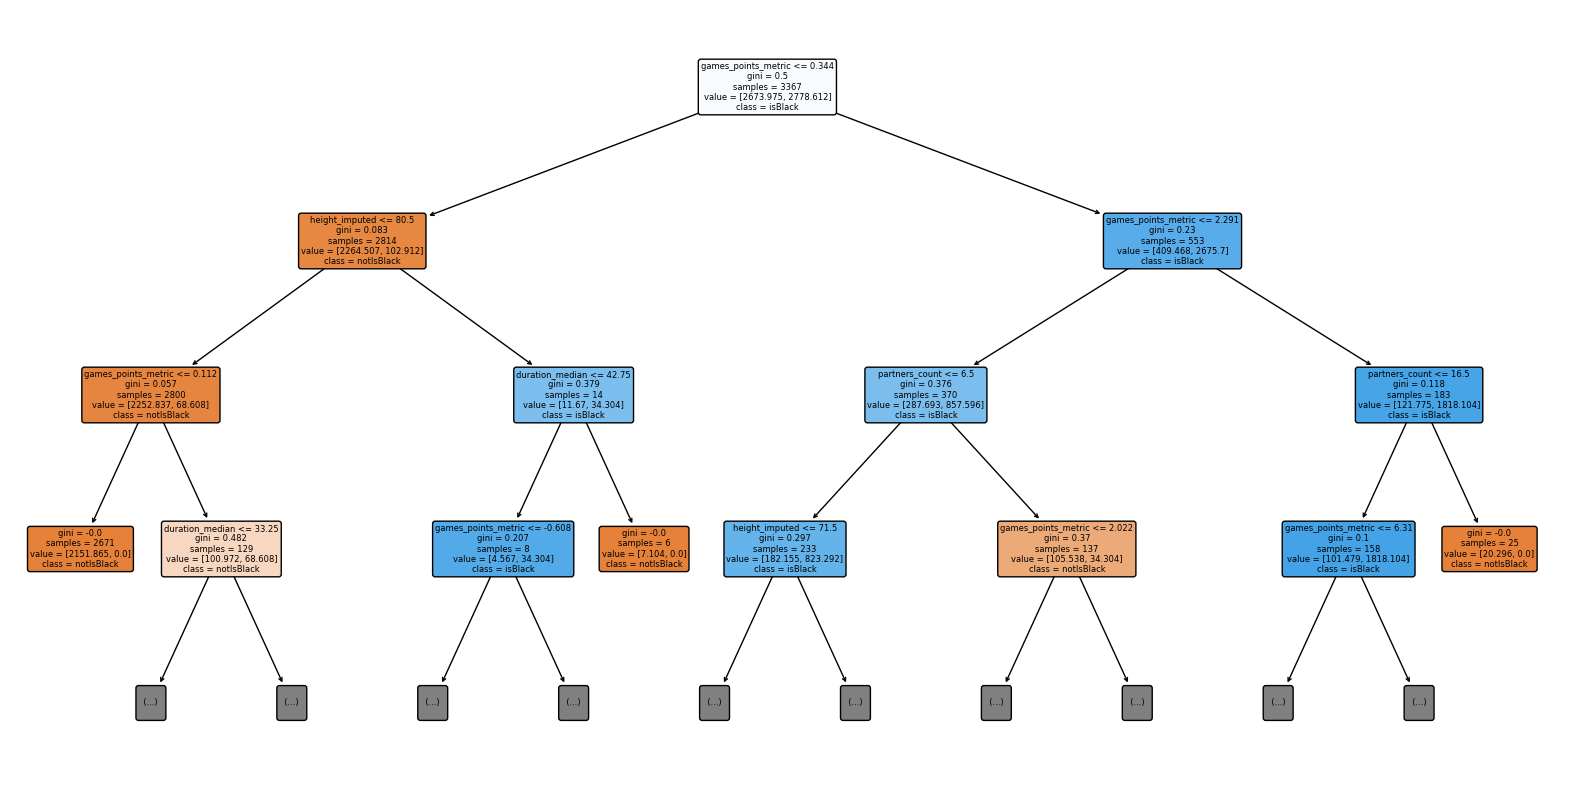

In [265]:
# Visualize an individual decision tree from the forest (index of the tree)
tree_index = 0  # Change this to visualize a different tree in the forest

plt.figure(figsize=(20, 10))
plot_tree(
    best_rf_classifier.estimators_[tree_index],
    feature_names=X.columns,
    filled=True,
    rounded=True,
    class_names=["notIsBlack", "isBlack"],
    max_depth=3,
)
plt.show()


In [ ]:
## separate Woman 

